<a href="https://colab.research.google.com/github/almiravelas/Zomato/blob/main/DATA100_studentcopy_midterms_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REQUIRED INFORMATION:


*  Full name: Almira Zabrina Alyson Q. Velasquez
*  Course and year level: BSCS ST 3rd Year
*  Date and time you started answering this notebook: 26/10/2024 3:27pm

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from numpy.testing import assert_almost_equal
sns.set_theme()

Links to downlaod the Walmart sales dataset. Choose one of the two: <br>
 1) Via GoogleDrive (just download this file): https://drive.google.com/file/d/1pKDG_mGCorv_N6fKfEunRS_pP9ZyrWEp/view?usp=sharing <br>
2) Via Github (there is a download button): https://github.com/efvaldez1/data100/blob/main/walmart-sales-dataset-of-45stores.csv <br>

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets (also called supercenters), discount department stores, and grocery stores in the United States. You are applying as a data analyst for the company and have been asked to do exploratory analysis on 45 of their stores. Basis for hiring will be coming from the score that you will get in this technical exam. The following fields have been provided to you:

Store - Numbers ranging from 1 to 45 to indicate unique identifier of the store <br>
Weekly_Sales - Total sales for a given week. It is in the format of dd-mm-yyyy. The date starts from 05-02-2010 <br>
Holiday_Flag - If the week has a special Holiday or not. 1 if there is holiday 0 if not. <br>
Temperature - Average Temperature of the week of sales <br>
Fuel_Price - Price of the Fuel in the region of the given store <br>
CPI - Customer Price Index, measures the monthly change in prices paid by U.S. consumers. <br>
Unemployment - Unemployment of the given store region <br>


In [ ]:
walmart_df = pd.read_csv('walmart-sales-dataset-of-45stores.csv') #your path to the walmart dataset
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'],format='%d-%m-%Y')
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


### How many rows and columns does this dataset have? (1pt)


In [ ]:
#your code here
walmart_df.shape

(6435, 8)

### What are the column names and data type for each column? (1pt) Hint: can be done in one line

In [ ]:
#your code here
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


### Check if the data contains duplicates (1pt)

In [ ]:
#your code
walmart_df.duplicated().sum()

0

### Check if the data contains null values. If there are null values which columns have null values. (1pt)

In [ ]:
#your code here
walmart_df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


### Introduce the following columns as part of the features for walmart dataframe: (4pts)
- Year - extract year from Weekly Sales column
- Month - extract month from Weekly Sales column
- Season: - field which contains the season (spring, summer, fall, winter). Use the logic below <br>
 **spring** March 1 to May 31 <br>
 **summer** June to Aug 31 <br>
 **fall** Sept 1 to Nov 30 <br>
 **winter** Dec 1 to Feb 28 <br>

In [ ]:
#your code
walmart_df['Year'] = walmart_df['Date'].dt.year
walmart_df['Month'] = walmart_df['Date'].dt.month
def get_season(month):
    if month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'fall'
    else:
        return 'winter'
walmart_df['Season'] = walmart_df['Month'].apply(get_season)

In [ ]:
walmart_df
#the result of printing/showing the variable walmart_df below should show the new features 'year', 'month', 'season'

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Season
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,winter
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,winter
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,winter
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,winter
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,spring
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,fall
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,fall
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,fall
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,fall


### Show the top 10 stores with highest number of sales for the year 2011 (2pts)

In [ ]:
#store results in top_10_stores variable
top_10_stores = walmart_df[walmart_df['Year'] == 2011].groupby('Store')['Weekly_Sales'].sum().nlargest(10)
top_10_stores


,Weekly_Sales
Store,
4,1.110923e+08
20,1.098370e+08
14,1.060963e+08
13,1.045375e+08
10,9.891689e+07
2,9.860788e+07
27,9.192268e+07
1,8.092192e+07
6,8.052876e+07


### What's the percentage contribution of the top 10 stores with respect to the overall sales in 2011? (2pts)

In [ ]:

# Calculate the total sales for 2011
total_sales_2011 = walmart_df[walmart_df['Year'] == 2011]['Weekly_Sales'].sum()

# Calculate the percentage contribution of the top 10 stores
percentage_contribution = (top_10_stores.sum() / total_sales_2011) * 100

print(f"The percentage contribution of the top 10 stores to the overall sales in 2011 is: {percentage_contribution:.2f}%")

The percentage contribution of the top 10 stores to the overall sales in 2011 is: 39.14%


### Do weeks with holidays have higher sales compared to non-holiday days? Show how you were able to justify this in code (2pt)

In [ ]:
#your code
holiday_sales = walmart_df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
print(holiday_sales)

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64


### Calculate How much sales does each season in a year contribute? (2pts)

In [ ]:
#store results in sale_season_year variable
sale_season_year = walmart_df.groupby('Season')['Weekly_Sales'].sum()
sale_season_year

,Weekly_Sales
Season,
fall,1.576562e+09
spring,1.796771e+09
summer,1.885721e+09
winter,1.478165e+09


### Recreate the chart as shown (Link to image via GoogleDrive https://drive.google.com/file/d/177L1Kpj2T2IzEoL3U3hX1kIqLPcrM3fI/view?usp=sharing)

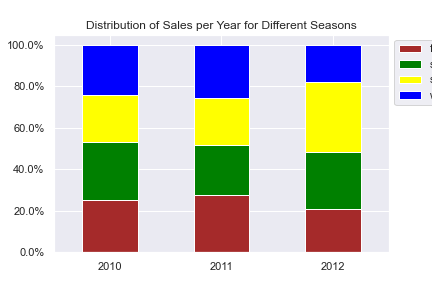

 which shows the Distribution of Sales per Year for Different Seasons. In the last line of your answer you should have a code to save the file as "<YOURFULLNAME>_distribution_per_year.png" using Matplotlib's .savefig() function  **(6pts)**

In [ ]:
season_year_sales = walmart_df.groupby(['Year', 'Season'])['Weekly_Sales'].sum().unstack()
season_year_percentage = season_year_sales.div(season_year_sales.sum(axis=1), axis=0) * 100

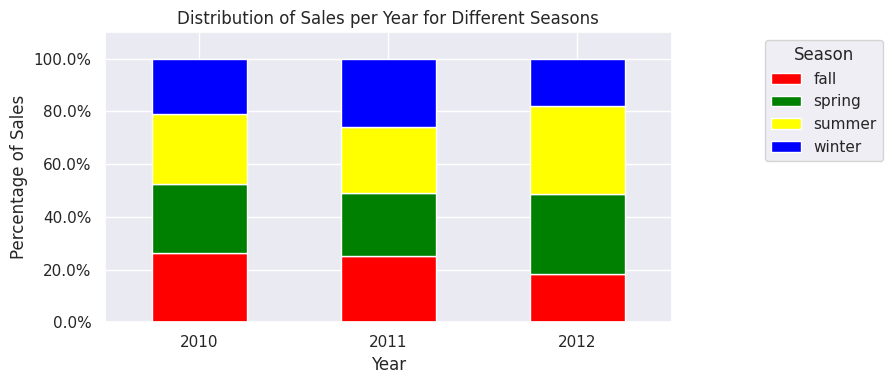

In [ ]:
colors = ["red", "green", "yellow", "blue"]

fig, ax = plt.subplots(figsize=(8, 4))
season_year_percentage.plot(kind='bar', stacked=True, color=colors, ax=ax)

ax.set_title("Distribution of Sales per Year for Different Seasons", fontsize=12)
ax.set_ylabel("Percentage of Sales")
ax.set_xlabel("Year")
ax.set_ylim(0, 110)
ax.legend(title="Season", bbox_to_anchor=(1.15, 1), loc='upper left')

ax.set_yticks(np.arange(0, 111, 20))
ax.set_yticklabels([f"{i:.1f}%" for i in range(0, 111, 20)])
plt.xticks(rotation=0)

plt.tight_layout()
plt.subplots_adjust(right=0.85)

# Save the figure
plt.savefig("VELASQUEZ_ALMIRA_distribution_per_year.png")
plt.show()

### Recreate the chart as shown (link to chart via GoogleDrive: https://drive.google.com/file/d/1ixU0f-ByGqLBS6W96sOxub8hVcv0hSrG/view?usp=sharing )

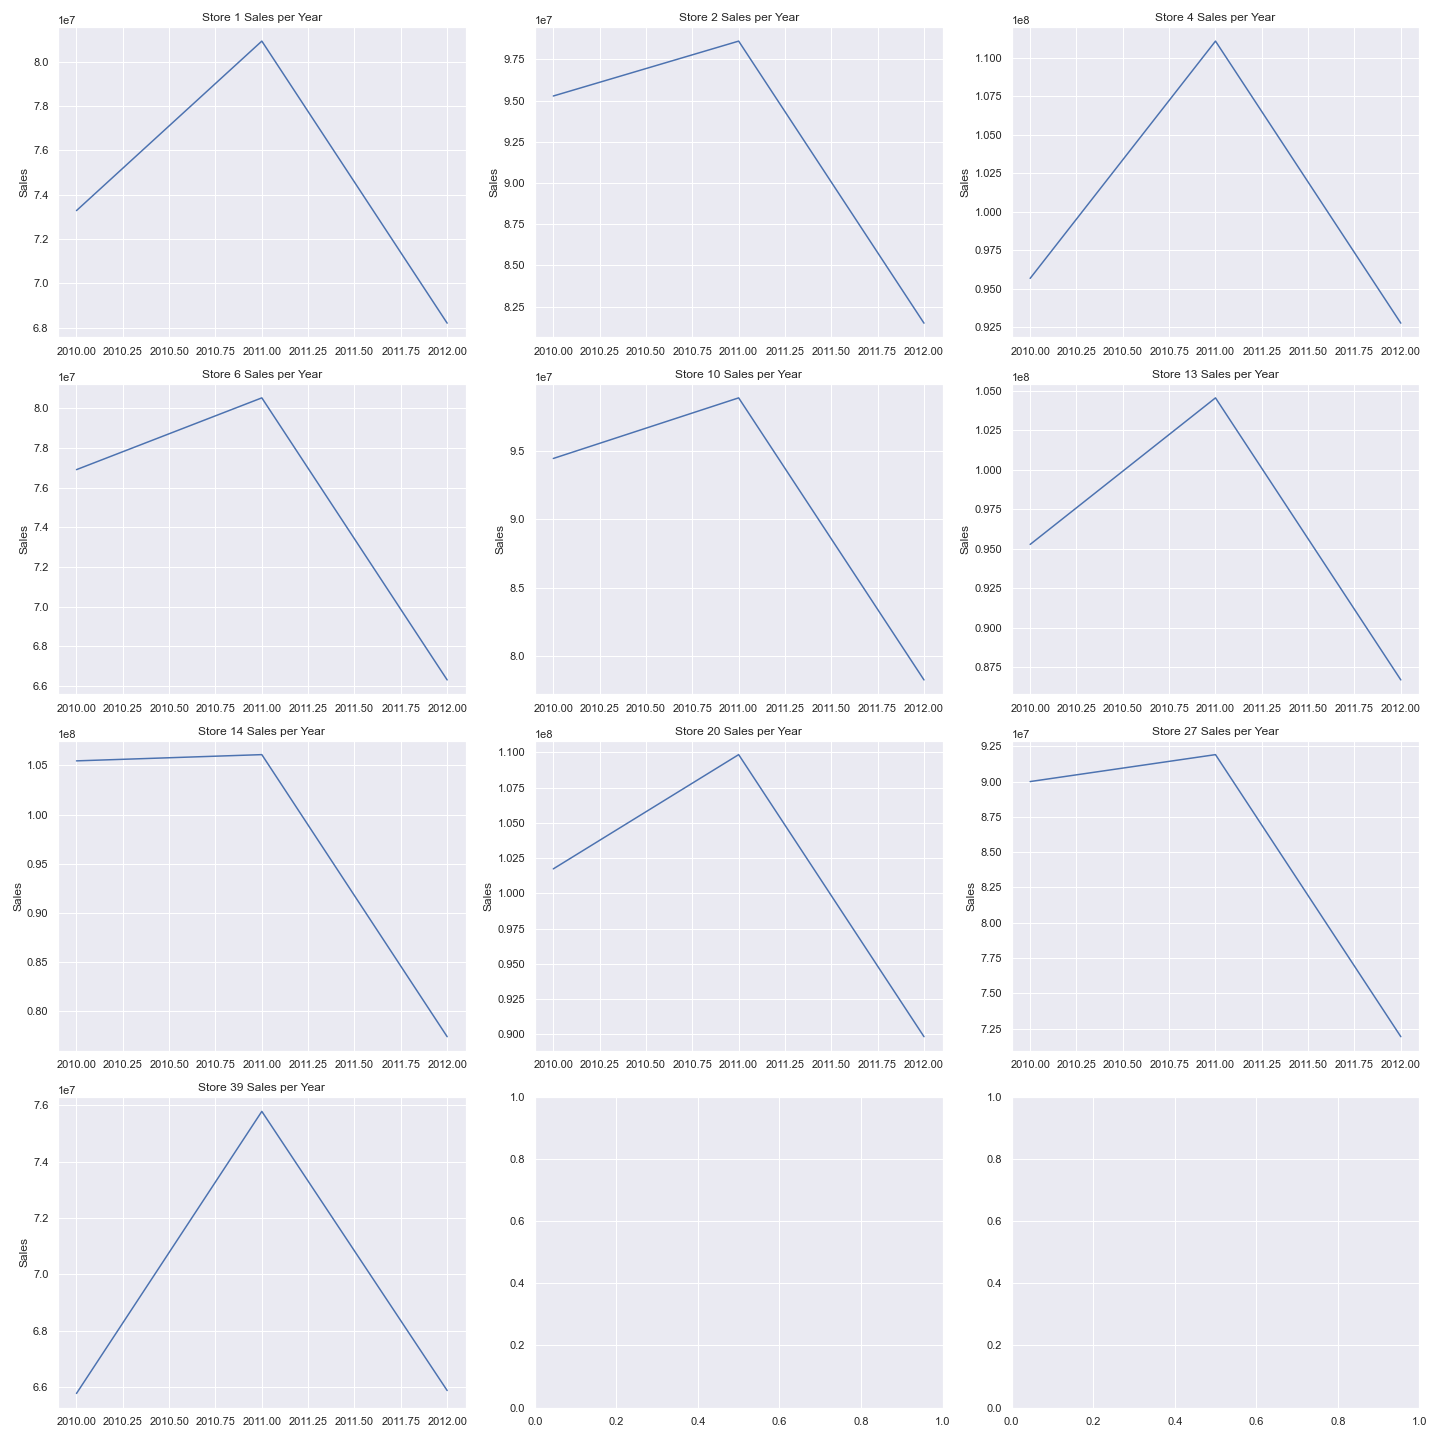

which shows the sales per year from the top 10 stores in 2011 (8pts)

First step calculate the weekly sales per year for the top 10 stores in 2011 **(3points out of 8points)**

In [ ]:
top_10_store_ids = top_10_stores.index
weekly_sales_top10 = walmart_df[walmart_df['Store'].isin(top_10_store_ids)].groupby(['Year', 'Store'])['Weekly_Sales'].sum()
weekly_sales_top10 = weekly_sales_top10.reset_index()

Second step visualize the sales per store for each year using seaborns lineplot https://seaborn.pydata.org/generated/seaborn.lineplot.html . In the last line of your answer you should have a code to save the file as "<YOURFULLNAME>_store_sales_per_year.png" using Matplotlib's .savefig() function **(5 points out of 8 points)**

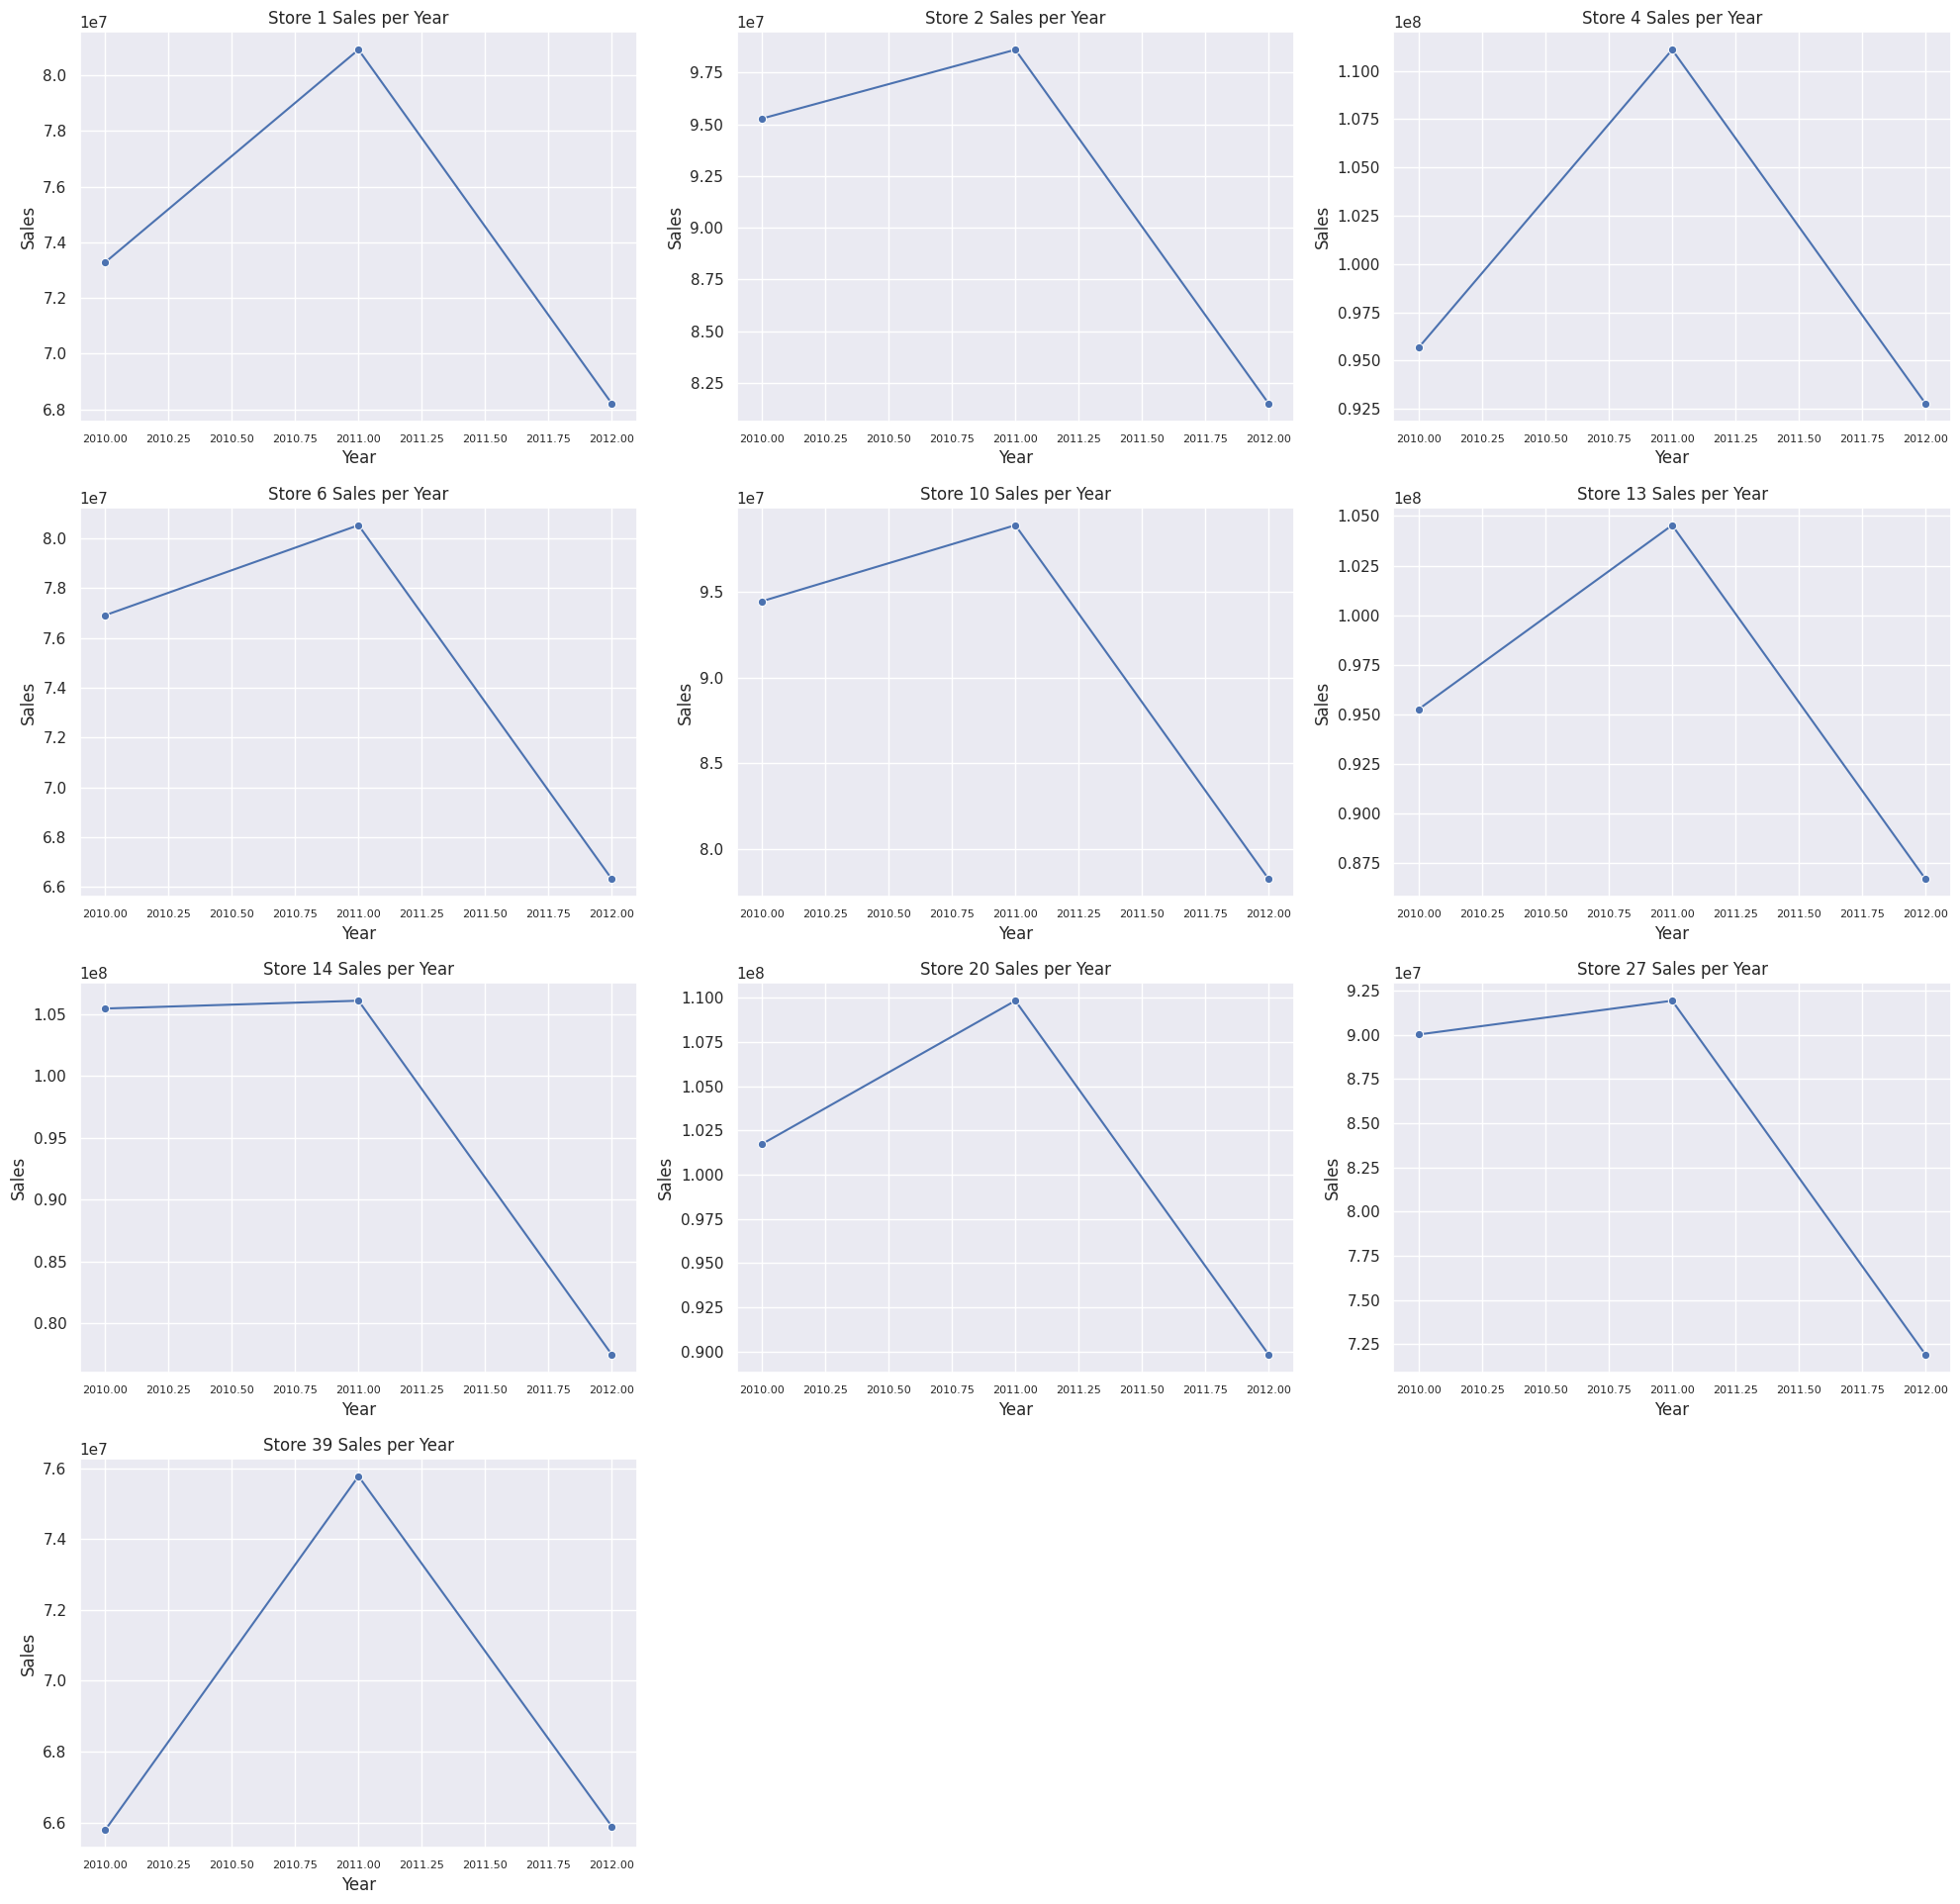

In [ ]:
sns.set_theme()
fig, axes = plt.subplots(4, 3, figsize=(20, 20))

stores = weekly_sales_top10['Store'].unique()[:12]
axes = axes.flatten()

for i, store in enumerate(stores):
    store_data = weekly_sales_top10[weekly_sales_top10['Store'] == store]
    sns.lineplot(ax=axes[i], x='Year', y='Weekly_Sales', data=store_data, marker='o')
    axes[i].set_title(f"Store {store} Sales per Year")
    axes[i].set_ylabel("Sales")
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].ticklabel_format(axis='y', style='sci', scilimits=(7, 8))

for j in range(len(stores), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.97])

plt.savefig("VELASQUEZ_ALMIRA_store_sales_per_year.png")

plt.show()